# Prediction using Decision Tree Algorithm

### Intermediate task 2

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # seaborn is bases on matplot
sns.set(color_codes=True) # adds a nice background
%matplotlib inline # tells python to actually display the graphs
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from os import system

UsageError: unrecognized arguments: # tells python to actually display the graphs


## Reading dataset

In [4]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(url)

In [5]:
dataset.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [7]:
dataset.columns = columns

In [8]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [9]:
dataset.shape

(149, 5)

In [10]:
dataset.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

In [11]:
dataset.isnull().values.any()

False

In [12]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
dataset['class'].value_counts()


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: class, dtype: int64

In [14]:
x = dataset.drop('class', axis=1)
y = dataset['class']

### Splitting data 

In [15]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=1)

### Decion Tree Model 

In [16]:
# Build Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

### Prediction

In [18]:

y_pred = dTree.predict(x_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa']


### Accuracy

In [20]:
# Scorring our Decision Tree
print("Accuracy",dTree.score(x_test,y_test)*100)

Accuracy 95.55555555555556


### Visualising

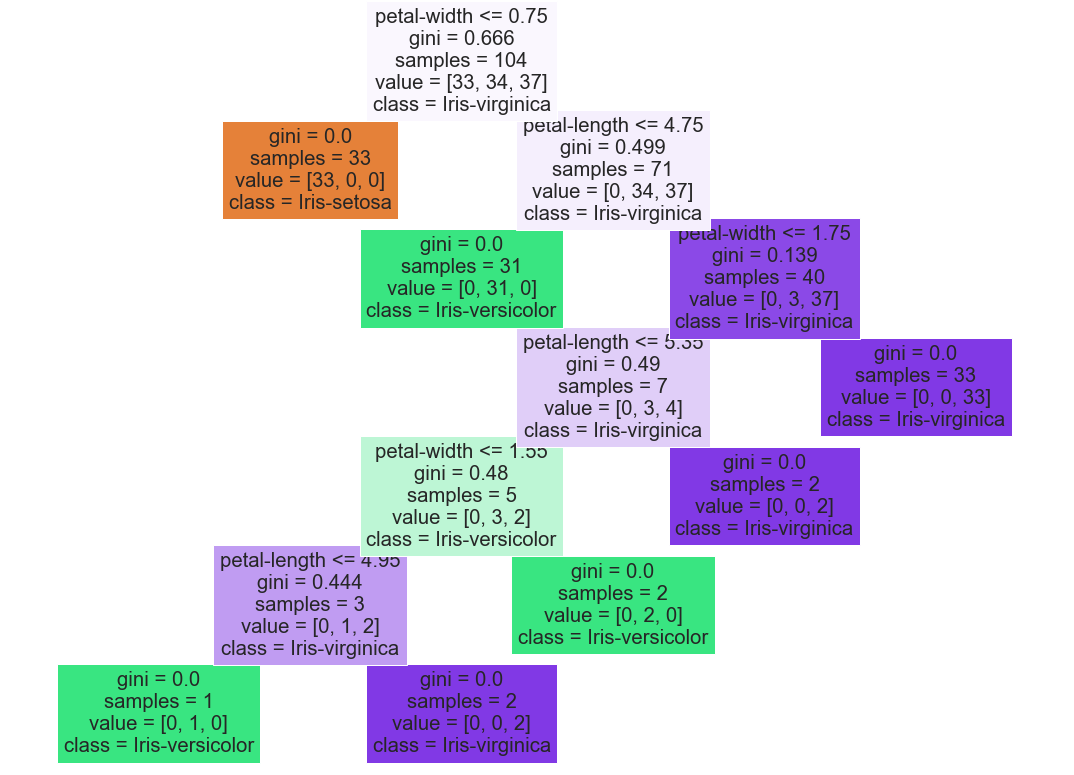

In [19]:

features = dataset.columns[:-1]
classes = dataset['class'].unique().tolist()

from sklearn.tree import plot_tree
plt.figure(figsize=(19, 14))
plot_tree(dTree, feature_names=features, class_names=classes, filled=True)
plt.show()